In [1]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# sklearn for machine learning in python:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
# import file
df=pd.read_csv('nba_rookie_data.csv')
df.head()

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [3]:
df.shape

(1340, 21)

In [4]:
#missing value
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1340 non-null   object 
 1   Games Played         1340 non-null   int64  
 2   Minutes Played       1340 non-null   float64
 3   Points Per Game      1340 non-null   float64
 4   Field Goals Made     1340 non-null   float64
 5   Field Goal Attempts  1340 non-null   float64
 6   Field Goal Percent   1340 non-null   float64
 7   3 Point Made         1340 non-null   float64
 8   3 Point Attempt      1340 non-null   float64
 9   3 Point Percent      1329 non-null   float64
 10  Free Throw Made      1340 non-null   float64
 11  Free Throw Attempts  1340 non-null   float64
 12  Free Throw Percent   1340 non-null   float64
 13  Offensive Rebounds   1340 non-null   float64
 14  Defensive Rebounds   1340 non-null   float64
 15  Rebounds             1340 non-null   f

Name                    0
Games Played            0
Minutes Played          0
Points Per Game         0
Field Goals Made        0
Field Goal Attempts     0
Field Goal Percent      0
3 Point Made            0
3 Point Attempt         0
3 Point Percent        11
Free Throw Made         0
Free Throw Attempts     0
Free Throw Percent      0
Offensive Rebounds      0
Defensive Rebounds      0
Rebounds                0
Assists                 0
Steals                  0
Blocks                  0
Turnovers               0
TARGET_5Yrs             0
dtype: int64

In [5]:
# Data Exploration
# statistical summary

In [6]:
df.head(10)

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


In [7]:
df.tail(10)

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
1330,Adam Keefe,82,18.9,6.6,2.3,4.6,50.0,0.0,0.0,0.0,...,2.9,70.0,2.1,3.2,5.3,1.0,0.7,0.2,1.2,1
1331,Lee Mayberry,82,18.3,5.2,2.1,4.6,45.6,0.5,1.3,39.1,...,0.8,57.4,0.3,1.1,1.4,3.3,0.7,0.1,1.0,1
1332,Hubert Davis,50,16.3,5.4,2.2,5.0,43.8,0.1,0.4,31.6,...,1.1,79.6,0.3,0.9,1.1,1.7,0.4,0.1,0.9,1
1333,Byron Houston,79,16.1,5.3,1.8,4.1,44.6,0.0,0.1,28.6,...,2.5,66.5,1.5,2.5,4.0,0.9,0.6,0.5,1.1,0
1334,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1
1339,Jon Barry,47,11.7,4.4,1.6,4.4,36.9,0.4,1.3,33.3,...,1.0,67.3,0.2,0.7,0.9,1.4,0.7,0.1,0.9,1


In [8]:
#remove the string column
df[df.columns[1:-1]]

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8


In [9]:
#copy of the column with empty datasets
new= df[('3 Point Percent')]
new.head()

0    25.0
1    23.5
2    24.4
3    22.6
4     0.0
Name: 3 Point Percent, dtype: float64

In [10]:
#filling the data with the mean
new= new.fillna(new.mean())

In [11]:
#add mean toempty data set
df[('3 Point Percent')]=new

In [12]:
#confirm missing column is gone
df.isna().sum()

Name                   0
Games Played           0
Minutes Played         0
Points Per Game        0
Field Goals Made       0
Field Goal Attempts    0
Field Goal Percent     0
3 Point Made           0
3 Point Attempt        0
3 Point Percent        0
Free Throw Made        0
Free Throw Attempts    0
Free Throw Percent     0
Offensive Rebounds     0
Defensive Rebounds     0
Rebounds               0
Assists                0
Steals                 0
Blocks                 0
Turnovers              0
TARGET_5Yrs            0
dtype: int64

In [13]:
df.describe()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,15.956966,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.200000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [14]:
df.corr()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
Games Played,1.000000,0.590240,0.538471,0.542724,0.516625,0.296289,0.107423,0.098772,0.038155,0.482123,0.479487,0.196299,0.401136,0.466840,0.460406,0.372749,0.451137,0.276498,0.518167,0.396833
Minutes Played,0.590240,1.000000,0.911822,0.903060,0.910247,0.203901,0.389920,0.403258,0.165701,0.791000,0.779609,0.239878,0.573062,0.745513,0.709707,0.629015,0.757034,0.399088,0.826500,0.317805
Points Per Game,0.538471,0.911822,1.000000,0.990834,0.979733,0.255333,0.346682,0.356751,0.150731,0.896297,0.880703,0.258931,0.575106,0.693934,0.676849,0.552338,0.675341,0.387043,0.850366,0.315981
Field Goals Made,0.542724,0.903060,0.990834,1.000000,0.980050,0.291693,0.289007,0.299057,0.119234,0.848019,0.840408,0.223566,0.596687,0.703278,0.691186,0.532534,0.662640,0.398125,0.834352,0.317594
Field Goal Attempts,0.516625,0.910247,0.979733,0.980050,1.000000,0.129798,0.390253,0.413560,0.196639,0.826616,0.805559,0.269614,0.504212,0.640123,0.614328,0.589818,0.690168,0.322184,0.845989,0.292660
Field Goal Percent,0.296289,0.203901,0.255333,0.291693,0.129798,1.000000,-0.294471,-0.350658,-0.328353,0.245776,0.300154,-0.161183,0.511367,0.410555,0.465423,-0.108797,0.056658,0.391626,0.121806,0.227134
3 Point Made,0.107423,0.389920,0.346682,0.289007,0.390253,-0.294471,1.000000,0.982616,0.588837,0.158472,0.095396,0.314355,-0.219010,0.016570,-0.072503,0.376604,0.306908,-0.158535,0.258369,0.036619
3 Point Attempt,0.098772,0.403258,0.356751,0.299057,0.413560,-0.350658,0.982616,1.000000,0.581037,0.173533,0.108388,0.323612,-0.231897,0.011226,-0.080939,0.410531,0.338631,-0.172150,0.283925,0.018110
3 Point Percent,0.038155,0.165701,0.150731,0.119234,0.196639,-0.328353,0.588837,0.581037,1.000000,0.030259,-0.032289,0.322305,-0.288333,-0.122665,-0.190708,0.261572,0.193895,-0.240987,0.108119,-0.003394
Free Throw Made,0.482123,0.791000,0.896297,0.848019,0.826616,0.245776,0.158472,0.173533,0.030259,1.000000,0.980505,0.257818,0.583865,0.653823,0.653833,0.476214,0.600158,0.407466,0.804990,0.296841


<AxesSubplot:>

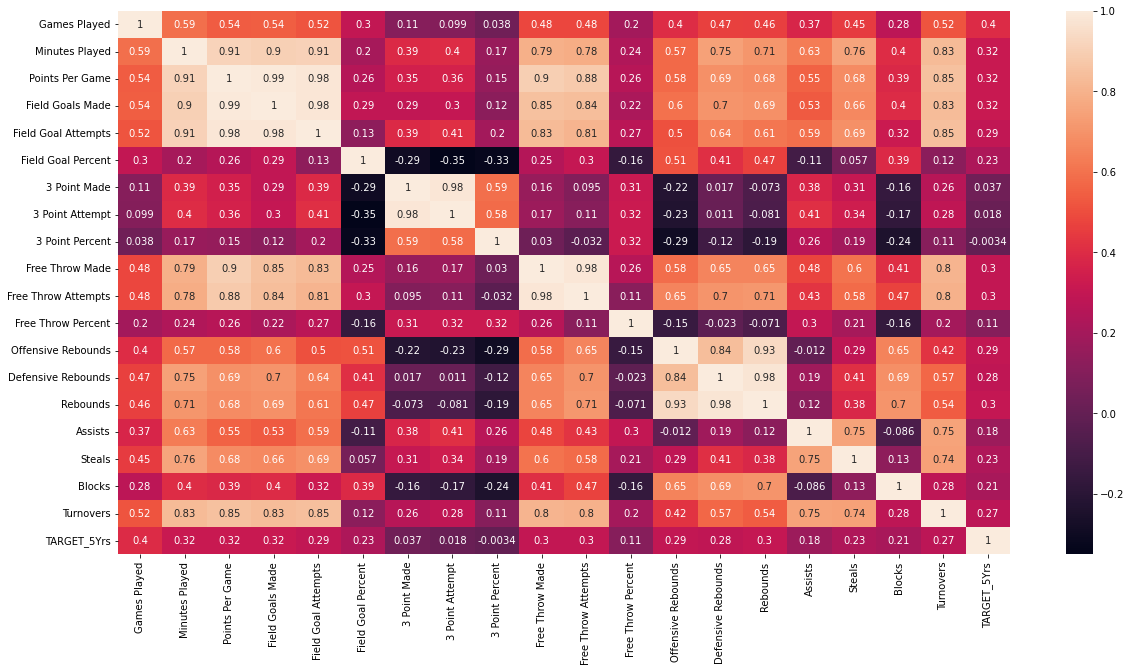

In [129]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)



In [15]:
#grouping and counting the dataset based on the target variable
print(df.groupby('TARGET_5Yrs')['Games Played'].count())

TARGET_5Yrs
0    509
1    831
Name: Games Played, dtype: int64


In [16]:
#defining input and output
x = df.iloc[:, 1].values #input
y = df.iloc[:, -1].values #output

In [17]:
x = x.reshape(-1, 1)

In [18]:
scaler = StandardScaler()
x_new = scaler.fit_transform(x)
x1 = pd.DataFrame(x_new, columns =['Games Played'])

In [19]:
#training and test sets:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 1/3, 
random_state=0)

In [20]:
#reshaping the dataset
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [21]:
#logistic regression
logre = LogisticRegression(max_iter=1000)
logre.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
y_pred = logre.predict(x_test)
print('Prediction:', y_pred)

Prediction: [0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1
 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 1]


In [23]:
#accuracy of the model
print('Our Accuracy is %.3f' % logre.score(x_test, y_test))

Our Accuracy is 0.682


In [24]:
#checking the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (x_test.shape[0], (y_test != logre.predict(x_test)).sum()))

Number of mislabeled points out of a total 447 points : 142


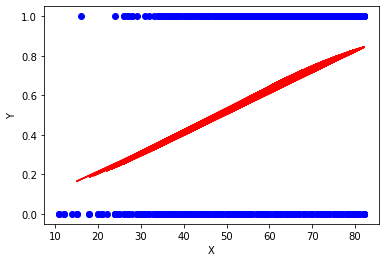

In [25]:
#visualizing datasets
fig1, ax1= plt.subplots()
ax1.scatter(x_train, y_train, color='blue')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.plot(x_test, logre.predict_proba(x_test)[:,1], color='red')

In [26]:
#evaluating the model performance
conf = metrics.confusion_matrix(y_test, y_pred)

In [27]:
#where conf is confusion metrix
conf

array([[ 74, 104],
       [ 38, 231]])

<AxesSubplot:>

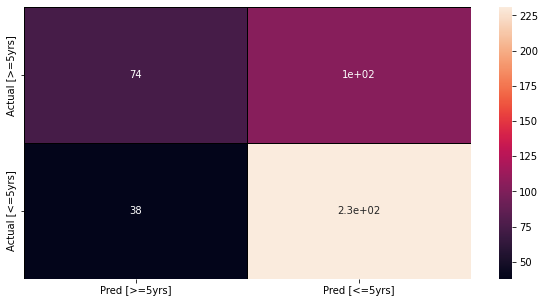

In [28]:
#confusion matrix visualization
ylabel = ["Actual [>=5yrs]","Actual [<=5yrs]"]
xlabel = ["Pred [>=5yrs]","Pred [<=5yrs]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(10,5))
sns.heatmap(conf, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='black', linewidths=1)

In [29]:
#evaluating model performance using classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.42      0.51       178
           1       0.69      0.86      0.76       269

    accuracy                           0.68       447
   macro avg       0.68      0.64      0.64       447
weighted avg       0.68      0.68      0.66       447



In [30]:
#Training the data set with Guassian Naive Bayes Model
Gnb = GaussianNB()
Gnb.fit(x_train, y_train)

GaussianNB()

In [31]:
#number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (x_test.shape[0], (y_test != Gnb.predict(x_test)).sum()))

Number of mislabeled points out of a total 447 points : 142


In [32]:
#checking the accuracy of the model
print('Our Accuracy is %.3f' % Gnb.score(x_test, y_test))

Our Accuracy is 0.682


In [33]:
y_pred = Gnb.predict(x_test)
print('Prediction:', y_pred)

Prediction: [0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1
 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 1]


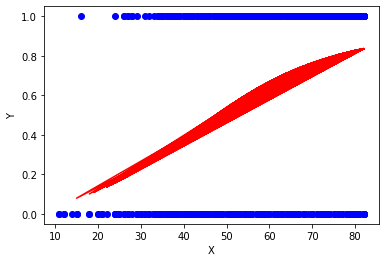

In [34]:
#visualizing datasets
fig1, ax1= plt.subplots()
ax1.scatter(x_train, y_train, color='blue')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.plot(x_test,Gnb.predict_proba(x_test)[:,1], color='red')

In [35]:
#model performance
conf = metrics.confusion_matrix(y_test, y_pred)

In [36]:
conf

array([[ 74, 104],
       [ 38, 231]])

<AxesSubplot:>

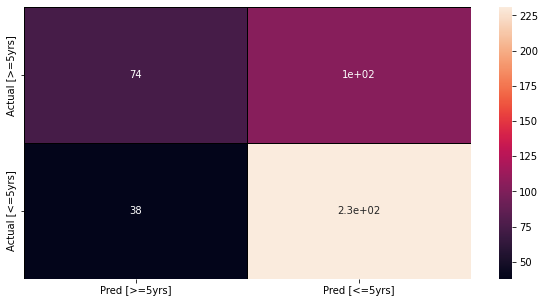

In [37]:
#confusion matrix visualization
ylabel = ["Actual [>=5yrs]","Actual [<=5yrs]"]
xlabel = ["Pred [>=5yrs]","Pred [<=5yrs]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(10,5))
sns.heatmap(conf, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='black', linewidths=1)

In [38]:
#evaluating model performance using classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.42      0.51       178
           1       0.69      0.86      0.76       269

    accuracy                           0.68       447
   macro avg       0.68      0.64      0.64       447
weighted avg       0.68      0.68      0.66       447



In [39]:
#Neural Network
#Training the data set with MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(), activation="logistic", random_state=0, max_iter = 2000)
mlp.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(), max_iter=2000,
              random_state=0)

In [40]:
#Testing the model
y_pred = mlp.predict(x_test)
print('Prediction:', y_pred)

Prediction: [1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [41]:
#Accuracy of the model
print('Our Accuracy is %.3f' % mlp.score(x_test, y_test))

Our Accuracy is 0.655


In [42]:
#number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (x_test.shape[0], (y_test != mlp.predict(x_test)).sum()))

Number of mislabeled points out of a total 447 points : 154


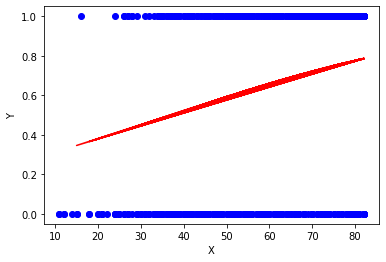

In [43]:
#visualizing datasets
fig1, ax1= plt.subplots()
ax1.scatter(x_train, y_train, color='blue')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.plot(x_test, mlp.predict_proba(x_test)[:,1], color='red')

In [44]:
#evaluating the model performance
conf = metrics.confusion_matrix(y_test, y_pred)

<AxesSubplot:>

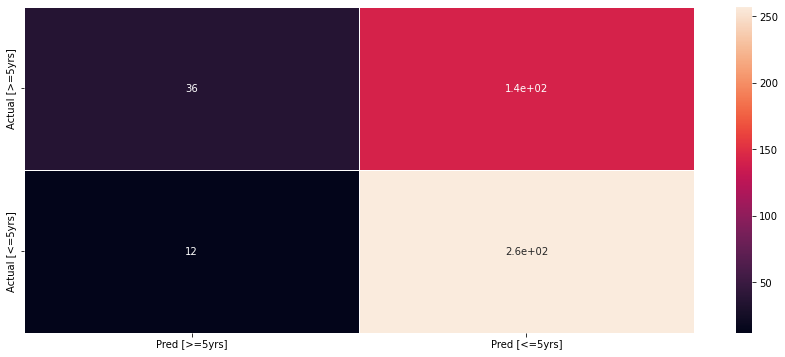

In [45]:
#confusion matrix visualization
ylabel = ["Actual [>=5yrs]","Actual [<=5yrs]"]
xlabel = ["Pred [>=5yrs]","Pred [<=5yrs]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.heatmap(conf, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

In [46]:
#evaluating model performance using classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.20      0.32       178
           1       0.64      0.96      0.77       269

    accuracy                           0.66       447
   macro avg       0.70      0.58      0.54       447
weighted avg       0.69      0.66      0.59       447



In [47]:
#defining input and output
x = df.iloc[:, [1, 2, 3]].values #input
y = df.iloc[:, -1].values #output

In [48]:
x

array([[36. , 27.4,  7.4],
       [35. , 26.9,  7.2],
       [74. , 15.3,  5.2],
       ...,
       [43. , 12.1,  5.4],
       [52. , 12. ,  4.5],
       [47. , 11.7,  4.4]])

In [49]:
x.shape

(1340, 3)

In [50]:
y

array([0, 0, 0, ..., 0, 1, 1])

In [51]:
#training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 1/3, 
random_state=0)

In [52]:
#Using logistic regression
logre = LogisticRegression(max_iter=1000)
logre.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [53]:
y_pred = logre.predict(x_test)
print('Prediction:', y_pred)

Prediction: [0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0
 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 1]


In [54]:
# accuracy of the model
print('Our Accuracy is %.2f' % logre.score(x_test, y_test))

Our Accuracy is 0.69


In [55]:
#checking the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (x_test.shape[0], (y_test != logre.predict(x_test)).sum()))

Number of mislabeled points out of a total 447 points : 138


In [56]:
#evaluating the model performance
conf= confusion_matrix(y_test, y_pred)

In [57]:
conf #confusion matrix

array([[ 81,  97],
       [ 41, 228]])

<AxesSubplot:>

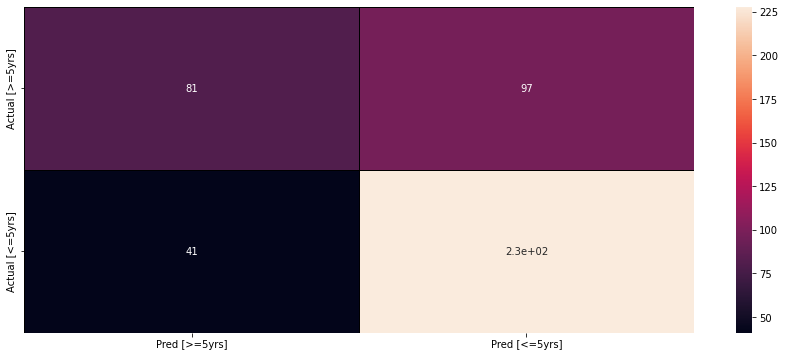

In [58]:
#confusion matrix visualization
ylabel = ["Actual [>=5yrs]","Actual [<=5yrs]"]
xlabel = ["Pred [>=5yrs]","Pred [<=5yrs]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.heatmap(conf, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='black', linewidths=1)

In [59]:
#evaluating model performance using classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.46      0.54       178
           1       0.70      0.85      0.77       269

    accuracy                           0.69       447
   macro avg       0.68      0.65      0.65       447
weighted avg       0.69      0.69      0.68       447



In [60]:
#Training the data set with Guassian Naive Bayes Model
Gnb = GaussianNB()
Gnb.fit(x_train, y_train)

GaussianNB()

In [61]:
y_pred =Gnb.predict(x_test)
print('Prediction:', y_pred)

Prediction: [0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1
 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1
 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1
 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0
 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1
 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1
 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1
 1 0 1]


In [62]:
#number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (x_test.shape[0], (y_test != Gnb.predict(x_test)).sum()))

Number of mislabeled points out of a total 447 points : 134


In [63]:
#Accuracy of the model
print('Our Accuracy is %.2f' % Gnb.score(x_test, y_test))


Our Accuracy is 0.70


In [64]:
y_test.shape

(447,)

In [65]:
#evaluating the model performance using confusion matrix
conf1  = metrics.confusion_matrix(y_test, y_pred)

In [66]:
conf1

array([[120,  58],
       [ 76, 193]])

<AxesSubplot:>

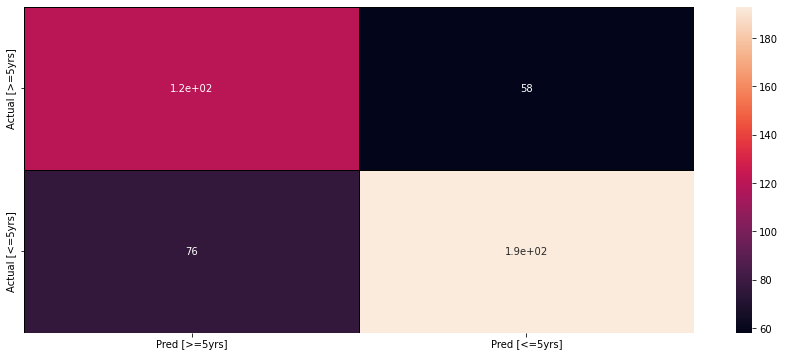

In [67]:
#Visualizing the confusion matrix based on actual and predicted
ylabel = ["Actual [>=5yrs]","Actual [<=5yrs]"]
xlabel = ["Pred [>=5yrs]","Pred [<=5yrs]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.heatmap(conf1, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='black', linewidths=1)

In [68]:
#evaluating the model performance using the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64       178
           1       0.77      0.72      0.74       269

    accuracy                           0.70       447
   macro avg       0.69      0.70      0.69       447
weighted avg       0.71      0.70      0.70       447



In [69]:
#Neural Network
#Training the data set with MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(), activation="logistic", random_state=0, max_iter = 2000)
mlp.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(), max_iter=2000,
              random_state=0)

In [70]:
#Testing the model
y_pred = mlp.predict(x_test)
print('Prediction:', y_pred)

Prediction: [1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1]


In [71]:
#Accuracy of the model
print('Our Accuracy is %.2f' % mlp.score(x_test, y_test))

Our Accuracy is 0.66


In [72]:
#number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (x_test.shape[0], (y_test != mlp.predict(x_test)).sum()))

Number of mislabeled points out of a total 447 points : 153


In [73]:
#confusion matrix
conf2 = metrics.confusion_matrix(y_test, y_pred)

In [74]:
conf2 #confusion matrix

array([[ 50, 128],
       [ 25, 244]])

<AxesSubplot:>

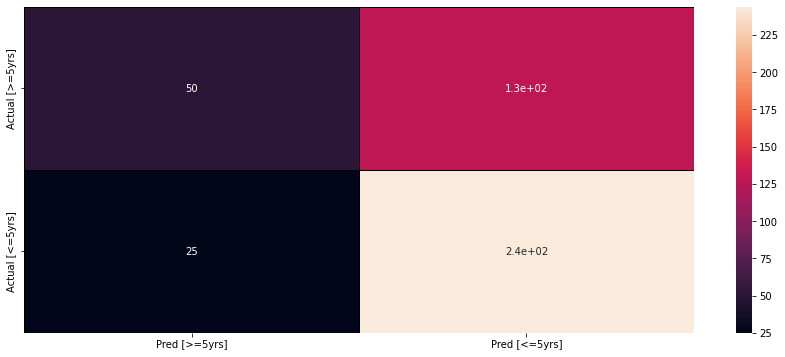

In [75]:
#visualizing confusion matrix
ylabel = ["Actual [>=5yrs]","Actual [<=5yrs]"]
xlabel = ["Pred [>=5yrs]","Pred [<=5yrs]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.heatmap(conf2, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='black', linewidths=1)

In [76]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.28      0.40       178
           1       0.66      0.91      0.76       269

    accuracy                           0.66       447
   macro avg       0.66      0.59      0.58       447
weighted avg       0.66      0.66      0.62       447



In [77]:
#defining input and output
x1 = df.iloc[:, [1, 2, 3, 4, 5, 6]].values #input
y1 = df.iloc[:, -1].values #output

In [78]:
x1.shape
x1

array([[36. , 27.4,  7.4,  2.6,  7.6, 34.7],
       [35. , 26.9,  7.2,  2. ,  6.7, 29.6],
       [74. , 15.3,  5.2,  2. ,  4.7, 42.2],
       ...,
       [43. , 12.1,  5.4,  2.2,  3.9, 55. ],
       [52. , 12. ,  4.5,  1.7,  3.8, 43.9],
       [47. , 11.7,  4.4,  1.6,  4.4, 36.9]])

In [79]:
# training and test sets:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size= 1/3, 
random_state=0)

In [80]:
#Logistic Regression
logre = LogisticRegression(max_iter=1000)
logre.fit(x1_train, y1_train)

LogisticRegression(max_iter=1000)

In [81]:
#predicting the dataset
y1_pred = logre.predict(x1_test)
print('Prediction:', y1_pred)

Prediction: [0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0
 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 1]


In [82]:
#checking the accuracy of the model
print('Our Accuracy is %.3f' % logre.score(x1_test, y1_test))

Our Accuracy is 0.702


In [83]:
#checking the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (x1_test.shape[0], (y1_test != logre.predict(x1_test)).sum()))

Number of mislabeled points out of a total 447 points : 133


In [84]:
#evaluating the model performance
conf3 = metrics.confusion_matrix(y1_test, y1_pred)

In [85]:
conf3

array([[ 83,  95],
       [ 38, 231]])

<AxesSubplot:>

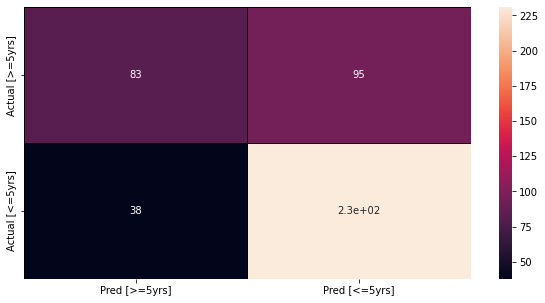

In [86]:
#visualizing confusion matrix
ylabel = ["Actual [>=5yrs]","Actual [<=5yrs]"]
xlabel = ["Pred [>=5yrs]","Pred [<=5yrs]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(10,5))
sns.heatmap(conf3, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='black', linewidths=1)

In [87]:
#evaluating model performance using classification report
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.69      0.47      0.56       178
           1       0.71      0.86      0.78       269

    accuracy                           0.70       447
   macro avg       0.70      0.66      0.67       447
weighted avg       0.70      0.70      0.69       447



In [88]:
#Training the data set with Guassian Naive Bayes Model
Gnb = GaussianNB()
Gnb.fit(x1_train, y1_train)

GaussianNB()

In [89]:
y_pred = Gnb.predict(x1_test)
print('Prediction:', y1_pred)

Prediction: [0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0
 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 1]


In [90]:
#checking the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (x_test.shape[0], (y1_test != Gnb.predict(x1_test)).sum()))

Number of mislabeled points out of a total 447 points : 141


In [91]:
#checking the accuracy of the model
print('Our Accuracy is %.3f' % Gnb.score(x1_test, y1_test))

Our Accuracy is 0.685


In [92]:
#Neural Network
#Training the data set with MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(), activation="logistic", random_state=0, max_iter = 2000)
mlp.fit(x1_train, y1_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(), max_iter=2000,
              random_state=0)

In [93]:
#Testing the model
y1_pred = mlp.predict(x1_test)
print('Prediction:', y1_pred)

Prediction: [0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1]


In [94]:
#Accuracy of the model
print('Our Accuracy is %.2f' % mlp.score(x1_test, y1_test))

Our Accuracy is 0.67


In [95]:
#number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (x1_test.shape[0], (y1_test != mlp.predict(x1_test)).sum()))

Number of mislabeled points out of a total 447 points : 148


In [96]:
#confusion matrix
conf4 = metrics.confusion_matrix(y1_test, y1_pred)

In [97]:
conf4

array([[ 62, 116],
       [ 32, 237]])

<AxesSubplot:>

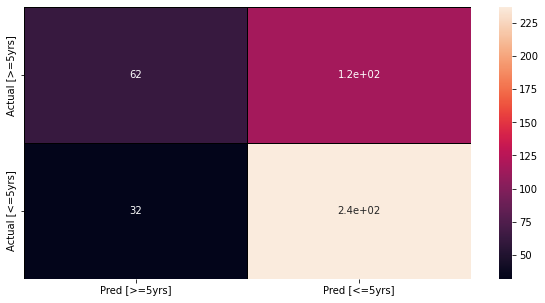

In [98]:
#visualizing confusion matrix
ylabel = ["Actual [>=5yrs]","Actual [<=5yrs]"]
xlabel = ["Pred [>=5yrs]","Pred [<=5yrs]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(10,5))
sns.heatmap(conf4, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='black', linewidths=1)

In [99]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.77      0.66       178
           1       0.80      0.63      0.71       269

    accuracy                           0.68       447
   macro avg       0.69      0.70      0.68       447
weighted avg       0.71      0.68      0.69       447



In [100]:
#defining input and output
x4 = df[df.columns[1:-1]].values #input
y3 = df.iloc[:, -1].values #output

In [101]:
x4

array([[36. , 27.4,  7.4, ...,  0.4,  0.4,  1.3],
       [35. , 26.9,  7.2, ...,  1.1,  0.5,  1.6],
       [74. , 15.3,  5.2, ...,  0.5,  0.3,  1. ],
       ...,
       [43. , 12.1,  5.4, ...,  0.3,  0.4,  0.9],
       [52. , 12. ,  4.5, ...,  0.4,  0.1,  0.8],
       [47. , 11.7,  4.4, ...,  0.7,  0.1,  0.9]])

In [102]:
scaler = StandardScaler()
x_new = scaler.fit_transform(x4)
scaled_x4 = pd.DataFrame(x_new,  columns =['Games Played', 'Minutes Played', 'Points Per Game', 'Field Goals Made', 'Field Goals Attempt', 'Field Goal Percent', '3 Point Made', '3 Point Attempt', '3 Point Percent', 'Free Throw Made', 'Free Throw Attempt', 'Free Throw Percent', 'Offensive Rebounds', 'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers'])

In [103]:
x3=scaled_x4

In [104]:
# training and test sets:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size= 1/3, 
random_state=0)

In [105]:
#Using logistic regression
logre = LogisticRegression(max_iter=1000)
logre.fit(x3_train, y3_train)

LogisticRegression(max_iter=1000)

In [106]:
#predicting the dataset
y3_pred = logre.predict(x3_test)
print('Prediction:', y3_pred)

Prediction: [0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1
 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0
 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 1]


In [107]:
#checking the accuracy of the model
print('Our Accuracy is %.4f' % logre.score(x3_test, y3_test))

Our Accuracy is 0.7159


In [108]:
#checking the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (x3_test.shape[0], (y3_test != logre.predict(x3_test)).sum()))

Number of mislabeled points out of a total 447 points : 127


In [109]:
#confusion matrix
conf5 = metrics.confusion_matrix(y3_test, y3_pred)

In [110]:
conf5

array([[ 93,  85],
       [ 42, 227]])

<AxesSubplot:>

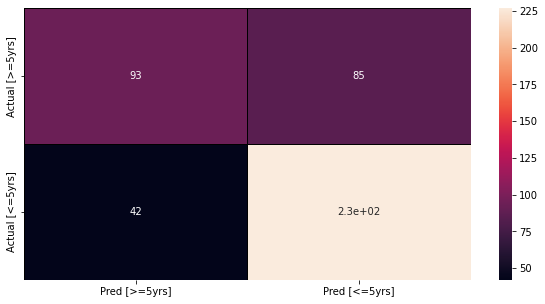

In [111]:
#visualizing confusion matrix
ylabel = ["Actual [>=5yrs]","Actual [<=5yrs]"]
xlabel = ["Pred [>=5yrs]","Pred [<=5yrs]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(10,5))
sns.heatmap(conf5, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='black', linewidths=1)

In [112]:
#classification report
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

           0       0.69      0.52      0.59       178
           1       0.73      0.84      0.78       269

    accuracy                           0.72       447
   macro avg       0.71      0.68      0.69       447
weighted avg       0.71      0.72      0.71       447



In [113]:
#Training the data set with Guassian Naive Bayes Model
Gnb = GaussianNB()
Gnb.fit(x3_train, y3_train)

GaussianNB()

In [114]:
y_pred = logre.predict(x3_test)
print('Prediction:', y3_pred)

Prediction: [0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1
 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0
 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 1]


In [115]:
#checking the accuracy of the model
print('Our Accuracy is %.4f' % Gnb.score(x3_test, y3_test))

Our Accuracy is 0.6734


In [116]:
#checking the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (x3_test.shape[0], (y3_test != Gnb.predict(x3_test)).sum()))

Number of mislabeled points out of a total 447 points : 146


In [117]:
#confusion matrix
conf6 = metrics.confusion_matrix(y3_test, y3_pred)

In [118]:
conf6

array([[ 93,  85],
       [ 42, 227]])

<AxesSubplot:>

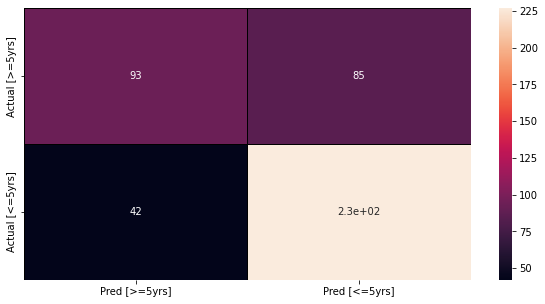

In [119]:
#visualizing confusion matrix
ylabel = ["Actual [>=5yrs]","Actual [<=5yrs]"]
xlabel = ["Pred [>=5yrs]","Pred [<=5yrs]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(10,5))
sns.heatmap(conf6, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='black', linewidths=1)

In [120]:
#classification report
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

           0       0.69      0.52      0.59       178
           1       0.73      0.84      0.78       269

    accuracy                           0.72       447
   macro avg       0.71      0.68      0.69       447
weighted avg       0.71      0.72      0.71       447



In [121]:
#Neural Network
#Training the data set with MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(), activation="logistic", random_state=0, max_iter = 2000)
mlp.fit(x3_train, y3_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(), max_iter=2000,
              random_state=0)

In [122]:
#Testing the model
y3_pred = mlp.predict(x3_test)
print('Prediction:', y3_pred)

Prediction: [0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1
 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0
 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 1]


In [123]:
#Accuracy of the model
print('Our Accuracy is %.4f' % mlp.score(x3_test, y3_test))

Our Accuracy is 0.7204


In [124]:
#number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (x3_test.shape[0], (y3_test != mlp.predict(x3_test)).sum()))

Number of mislabeled points out of a total 447 points : 125


In [125]:
#confusion matrix
conf7 = metrics.confusion_matrix(y3_test, y3_pred)

In [126]:
conf7

array([[ 93,  85],
       [ 40, 229]])

<AxesSubplot:>

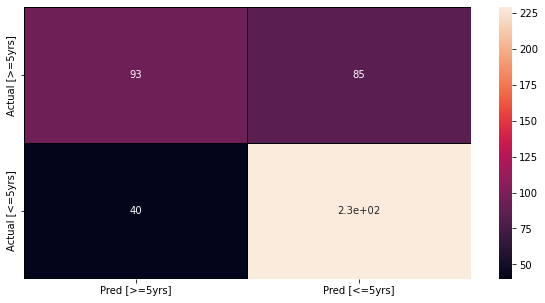

In [127]:
#visualizing confusion matrix
ylabel = ["Actual [>=5yrs]","Actual [<=5yrs]"]
xlabel = ["Pred [>=5yrs]","Pred [<=5yrs]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(10,5))
sns.heatmap(conf7, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='black', linewidths=1)

In [128]:
#classification report
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

           0       0.70      0.52      0.60       178
           1       0.73      0.85      0.79       269

    accuracy                           0.72       447
   macro avg       0.71      0.69      0.69       447
weighted avg       0.72      0.72      0.71       447

